Loaded Odom Data:
[[-2.83201591e-02 -2.20852231e-06  1.50589896e-04]
 [-2.84856879e-02 -2.23352334e-06  1.51443197e-04]
 [-2.86512098e-02 -2.25866480e-06  1.52298543e-04]
 ...
 [ 2.40711550e+00 -6.06559742e-01 -2.90597966e+00]
 [ 2.38588960e+00 -6.11655746e-01 -2.90595659e+00]
 [ 1.71897589e-01 -1.14548678e+00 -2.90323632e+00]]
odom data shape (368, 3)
Loaded Filter Data:
[[-3.63933280e-04  5.19417493e-09 -2.52087930e-05]
 [-5.29354854e-04  1.02323877e-08 -3.30295228e-05]
 [-6.94778096e-04  1.53567943e-08 -3.23232549e-05]
 ...
 [ 2.43106658e+00 -5.63505262e-01 -2.93927950e+00]
 [ 2.40971995e+00 -5.67834982e-01 -2.93925803e+00]
 [ 1.72457074e-01 -1.02203437e+00 -2.93712189e+00]]
filter data shape (368, 3)
Loaded Ground Truth Data:
[[-2.83123816e-02 -2.59241508e-06  1.50582657e-04]
 [-2.84778885e-02 -2.61782215e-06  1.51440977e-04]
 [-2.86433802e-02 -2.64336457e-06  1.52300847e-04]
 ...
 [ 2.30751242e+00 -5.72015518e-01 -2.96723834e+00]
 [ 2.28601420e+00 -5.75802534e-01 -2.96721351e+00]


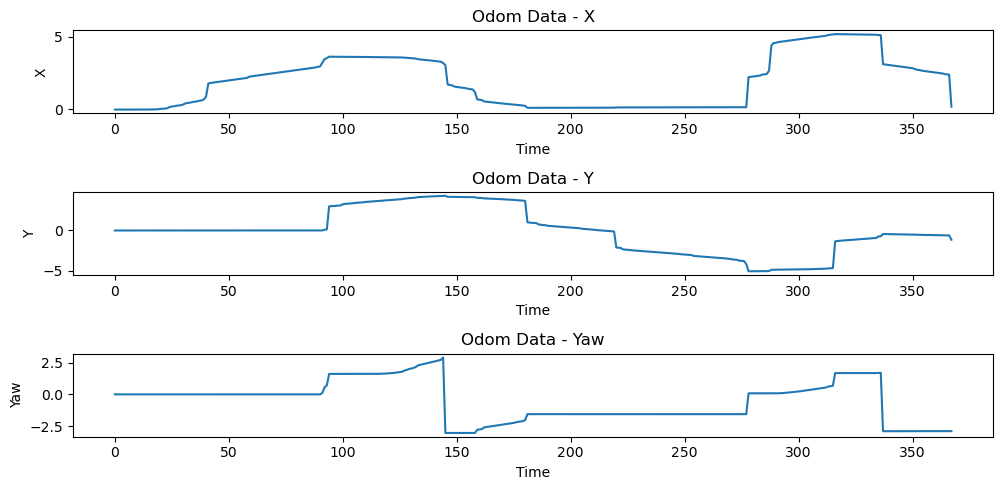

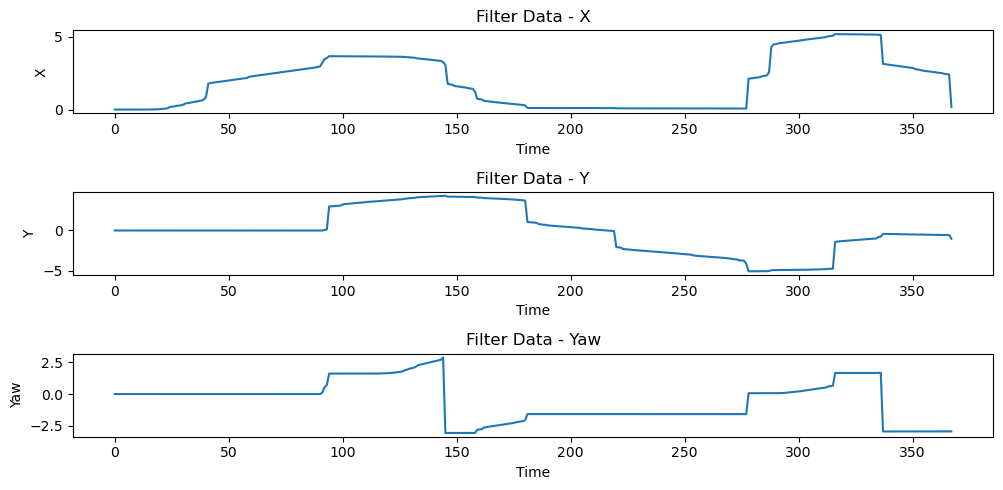

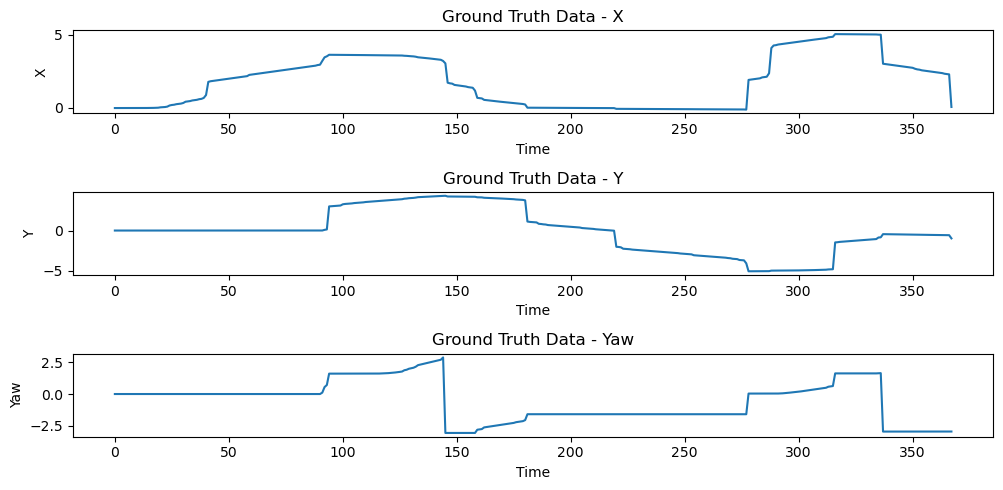

try difference
[[-7.77750800e-06  3.83892771e-07  7.23901533e-09]
 [-7.79938455e-06  3.84298814e-07  2.21997926e-09]
 [-7.82960121e-06  3.84699774e-07 -2.30438037e-09]
 ...
 [ 9.96030802e-02 -3.45442239e-02  6.12586786e-02]
 [ 9.98753928e-02 -3.58532120e-02  6.12569233e-02]
 [ 1.27296689e-01 -1.72336269e-01  6.10130059e-02]]


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(data, title):
    plt.figure(figsize=(10, 5))
    time = np.arange(len(data))

    plt.subplot(3, 1, 1)
    plt.plot(time, data[:, 0], label='X')
    plt.title(f'{title} - X')
    plt.xlabel('Time')
    plt.ylabel('X')

    plt.subplot(3, 1, 2)
    plt.plot(time, data[:, 1], label='Y')
    plt.title(f'{title} - Y')
    plt.xlabel('Time')
    plt.ylabel('Y')

    plt.subplot(3, 1, 3)
    plt.plot(time, data[:, 2], label='Yaw')
    plt.title(f'{title} - Yaw')
    plt.xlabel('Time')
    plt.ylabel('Yaw')

    plt.tight_layout()
    plt.show()

def metrics(odom, ground, filter):
#RMSE
    #exclude yaw from odom, filter and ground truth
    odom_xy = odom[:,:2]
    filter_xy = filter[:,:2]
    ground_xy = ground[:,:2]
    # subtract ground truth from both odom and filter and square
    odom_gt = np.square(odom_xy - ground_xy)
    #print("odom_gt", odom_gt)
    filter_gt = np.square (filter_xy - ground_xy) 
    #sum the x difference squared and the y difference squared
    odom_gt_sum = np.sum(odom_gt, axis=1, keepdims=True)
    filter_gt_sum = np.sum(filter_gt, axis=1, keepdims=True)
    # sum the elemnts in the colums to obtain 1 value (SE = square cumulative error)
    odom_SE = np.sum(odom_gt_sum)
    filter_SE = np.sum(filter_gt_sum)
    # do the RMSE
    N = len(odom_xy)
    RMSE_o_xy = np.sqrt(odom_SE/N)
    RMSE_f_xy = np.sqrt(filter_SE/N)
    #YAW RMSE
    odom_yaw_gt = np.sum((odom[:,2]-ground[:,2])**2)
    filter_yaw_gt = np.sum((filter[:,2] - ground[:,2])**2)
    RMSE_o_yaw = np.sqrt(odom_yaw_gt/N)
    RMSE_f_yaw = np.sqrt(filter_yaw_gt/N)
    RMSE_odom = [RMSE_o_xy, RMSE_o_yaw]
    RMSE_filter = [RMSE_f_xy, RMSE_f_yaw]

#MAE maximum absolute error
    MAE_o_xy = np.max(np.sqrt(odom_gt_sum)) #MAE odom position

    MAE_f_xy = np.max(np.sqrt(odom_gt_sum)) #MAE filter position

    diff_odom_yaw = (odom[:,2]-ground[:,2])**2
    MAE_o_yaw = np.max(np.sqrt(diff_odom_yaw)) #MAE odom yaw

    diff_filter_yaw = filter[:,2]-ground[:,2]
    MAE_f_yaw = np.max(np.abs(diff_filter_yaw)) #MAE filter yaw

    MAE_odom = [MAE_o_xy, MAE_o_yaw] 
    MAE_filter = [MAE_f_xy, MAE_f_yaw]

#Total cumulative error computation
    #distances euclidean with norm
    odom_dist = np.linalg.norm(odom_xy - ground_xy, axis=1)
    TCE_odom_xy = np.sum(odom_dist)
    filter_dist = np.linalg.norm(filter_xy - ground_xy, axis=1)
    TCE_filter_xy = np.sum(filter_dist)
    TCE_odom_yaw = np.sum(np.linalg.norm(odom[:,2] - ground[:,2]))
    TCE_filter_yaw = np.sum(np.linalg.norm(filter[:,2] - ground[:,2]))
    TCE_odom = [TCE_odom_xy, TCE_filter_xy]
    TCE_filter = [TCE_odom_yaw, TCE_filter_yaw]

    tot_distance_odom = np.sum(np.linalg.norm(odom_xy, axis=1))
    
    return RMSE_odom, RMSE_filter, MAE_odom, MAE_filter, TCE_odom, TCE_filter
#percentage of the final position on the total travelled distance
def odom_metrics(odom, ground):
   
    odom_xy = odom[:,:2]
    odom_yaw = odom[:,-1]

    ground_xy = ground[:,:2]
    ground_yaw = ground[:,-1]

    N = len(odom_xy)

    e_xy = np.linalg.norm(odom_xy-ground_xy, axis=-1)
    se_xy = np.square(e_xy)
    mse_xy = np.sum(se_xy)/N
    rmse_xy = np.sqrt(mse_xy)

    e_yaw = odom_yaw-ground_yaw
    se_yaw = np.square(e_yaw)
    mse_yaw = np.sum(se_yaw)/N
    rmse_yaw = np.sqrt(mse_yaw)

    RMSE_odom = [rmse_xy, rmse_yaw]
    MAE_odom = [np.max(e_xy), np.max(np.abs(e_yaw))]
    TCE_odom = [np.sum(e_xy), np.sum(np.abs(e_yaw))]

    odom_x = odom_xy[:,0]
    odom_y = odom_xy[:,-1]

    # Initialize total distance
    TDT_odom = 0.0

# Iterate through points and calculate distances
    for i in range(len(N) - 1):
        
        delta_x = odom_x[i+1] - odom_x[i]
        delta_y = odom_y[i+1] - odom_y[i]
        distance = np.sqrt(delta_x**2 + delta_y**2)
        TDT_odom += distance

    print("Total Distance Traveled:", TDT_odom)
    
    e_p_odom = TCE_odom/TDT_odom
    
    
    return RMSE_odom, MAE_odom, TCE_odom, e_p_odom

def filter_metrics(filter, ground):
   
    filter_xy = filter[:,:2]
    filter_yaw = filter[:,-1]

    ground_xy = ground[:,:2]
    ground_yaw = ground[:,-1]

    N = len(filter_xy)

    e_xy = np.linalg.norm(filter_xy-ground_xy, axis=-1)
    se_xy = np.square(e_xy)
    mse_xy = np.sum(se_xy)/N
    rmse_xy = np.sqrt(mse_xy)

    e_yaw = filter_yaw-ground_yaw
    se_yaw = np.square(e_yaw)
    mse_yaw = np.sum(se_yaw)/N
    rmse_yaw = np.sqrt(mse_yaw)

    RMSE_filter = [rmse_xy, rmse_yaw]   
    MAE_filter = [np.max(e_xy), np.max(np.abs(e_yaw))]
    TCE_filter = [np.sum(e_xy), np.sum(np.abs(e_yaw))]

    return RMSE_filter, MAE_filter, TCE_filter

odom_data = np.load("odom.npy")
filter_data = np.load("filter.npy")
ground_truth_data = np.load("ground_truth.npy")

print("Loaded Odom Data:")
print(odom_data)
print("odom data shape", odom_data.shape)

print("Loaded Filter Data:")
print(filter_data)
print("filter data shape", filter_data.shape)


print("Loaded Ground Truth Data:")
print(ground_truth_data)
print("ground_truth data shape", ground_truth_data.shape)

#print("odom_metrics:", odom_metrics)
#print("filter_metrics:", filter_metrics)
#print("ground_truth_metrics:", ground_truth_metrics)
        # Visualize the data
plot_data(odom_data, 'Odom Data')
plot_data(filter_data, 'Filter Data')
plot_data(ground_truth_data, 'Ground Truth Data')

print("try difference")
print(odom_data-ground_truth_data)